Model Performance Results
      Metric  Training Set  Testing Set
0       RMSE      0.389280     1.062670
1        MSE      0.151539     1.129268
2        MAE      0.314975     0.861758
3  R-squared      0.848831    -0.144081


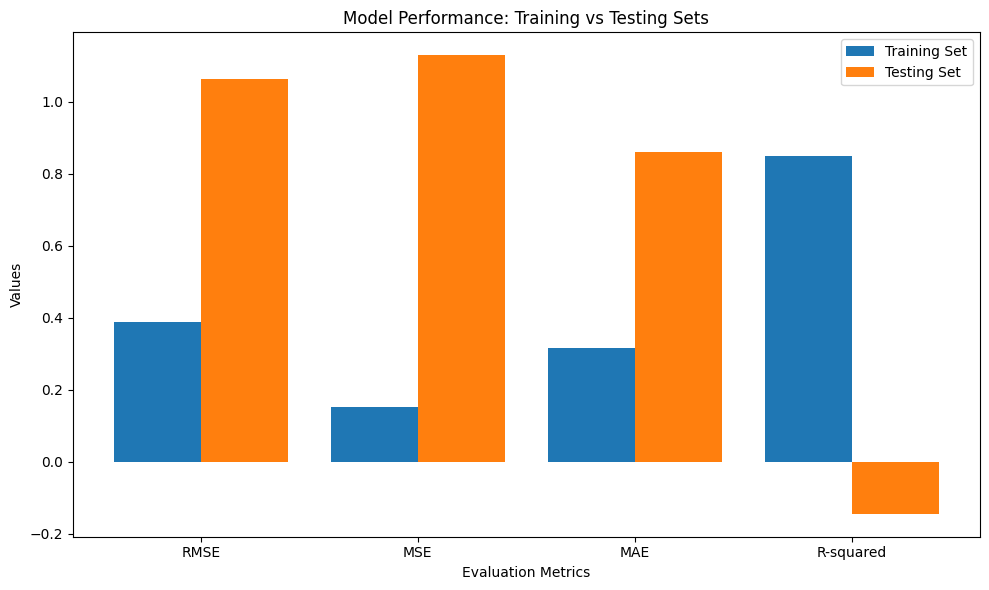

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Processed_Fashion_Retail_Sales.csv'
data = pd.read_csv(file_path)

# Select features and target variable
selected_features = ['Year', 'Month', 'Weekday', 'Item Purchased Encoded', 'Review Rating', 'Payment Method Encoded']
target_variable = 'Standardized Purchase Amount (USD)'

# Prepare the data for training and testing
X = data[selected_features]
y = data[target_variable]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Generate predictions for the training set
y_train_pred = rf_regressor.predict(X_train)

# Generate predictions for the testing set
y_test_pred = rf_regressor.predict(X_test)

# Calculate metrics for the training set
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for the testing set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Create a table of results for training and testing sets
results = pd.DataFrame({
    'Metric': ['RMSE', 'MSE', 'MAE', 'R-squared'],
    'Training Set': [train_rmse, train_mse, train_mae, train_r2],
    'Testing Set': [test_rmse, test_mse, test_mae, test_r2]
})

# Display the table
print("Model Performance Results")
print(results)

# Plot the results for visualization
metrics = ['RMSE', 'MSE', 'MAE', 'R-squared']
training_values = [train_rmse, train_mse, train_mae, train_r2]
testing_values = [test_rmse, test_mse, test_mae, test_r2]

plt.figure(figsize=(10, 6))
x = range(len(metrics))
plt.bar(x, training_values, width=0.4, label='Training Set', align='center')
plt.bar([p + 0.4 for p in x], testing_values, width=0.4, label='Testing Set', align='center')
plt.xticks([p + 0.2 for p in x], metrics)
plt.xlabel('Evaluation Metrics')
plt.ylabel('Values')
plt.title('Model Performance: Training vs Testing Sets')
plt.legend()
plt.tight_layout()
plt.show()
